In [163]:
#| echo: false
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


final_ma_data = pd.read_csv('/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework4/data/Output/final_ma_data.csv')

HOMEWORK 4 BY AVANTH PAKANATI

[ACCESS GITHUB HERE](https://github.com/avanthp/Homework4.git)

Question 1

<Figure size 1200x600 with 0 Axes>

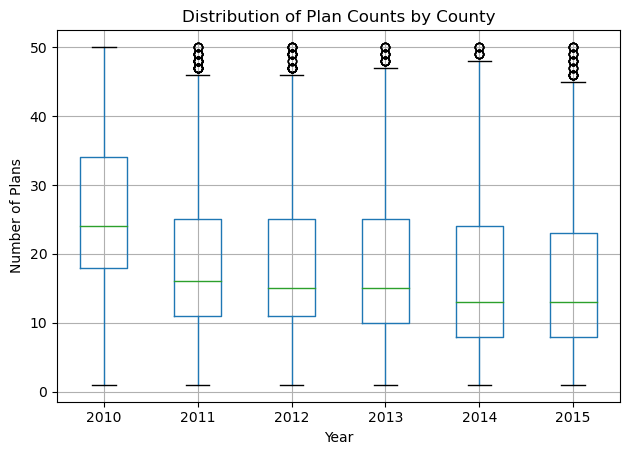

In [164]:
#| echo: false
warnings.filterwarnings("ignore")

#QUESTION 1 
final_ma_data.columns = final_ma_data.columns.str.lower()
# Remove SNPs and removing 800 plans
final_ma_data = final_ma_data[final_ma_data['snp'] != 'Yes']


final_ma_data = final_ma_data[~final_ma_data['planid'].astype(str).str.startswith('800')]

# Remove prescription drug-only plans 
final_ma_data = final_ma_data[~final_ma_data['plan_type'].str.contains('PDP', na=False)]

# Group by year and county
plan_counts = (
    final_ma_data.groupby(['year', 'county'])
    .size()
    .reset_index(name='plan_count')
)
plan_counts = plan_counts[plan_counts['plan_count'] <= 50]

#plotting
plt.figure(figsize=(12, 6))
plan_counts.boxplot(column='plan_count', by='year')
plt.title('Distribution of Plan Counts by County')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Number of Plans')
plt.grid(True)
plt.tight_layout()
plt.show()

This figure shows that the number of plans is too few and shows that the market is concentrated within regions.

Question 2

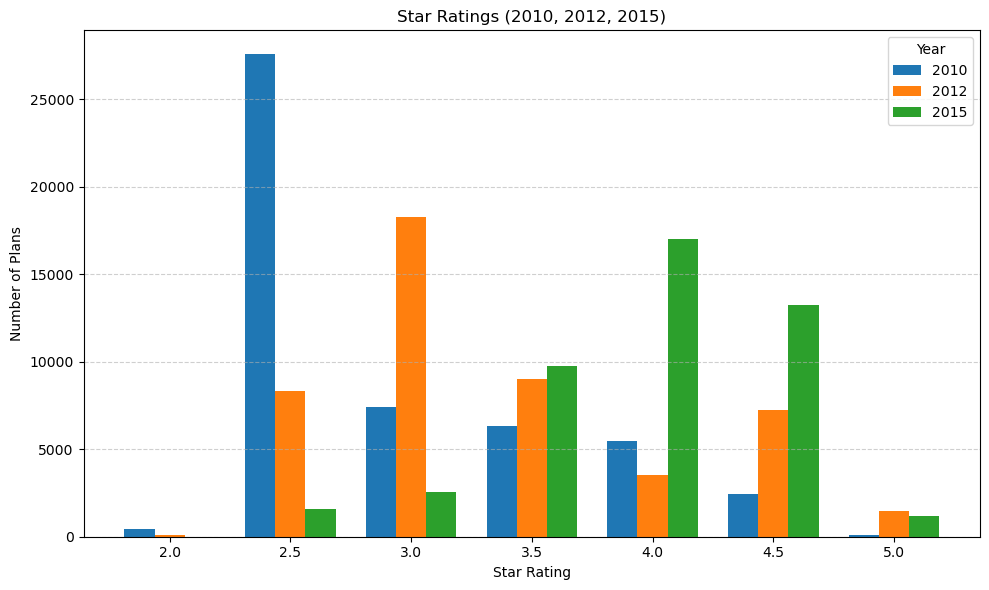

In [165]:
#| echo: false
#Question 2


final_ma_data_2 = final_ma_data.copy()

final_ma_data_filtered = final_ma_data_2[final_ma_data_2['year'].isin([2010, 2012, 2015])]

star_counts = (
    final_ma_data_filtered.groupby(['star_rating', 'year'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)



star_ratings = sorted(star_counts.index)

x = np.arange(len(star_ratings))  
width = 0.25  

#plotting
plt.figure(figsize=(10, 6))

plt.bar(x - width, star_counts[2010], width=width, label='2010')
plt.bar(x,         star_counts[2012], width=width, label='2012')
plt.bar(x + width, star_counts[2015], width=width, label='2015')

plt.xticks(x, star_ratings) 
plt.xlabel('Star Rating')
plt.ylabel('Number of Plans')
plt.title('Star Ratings (2010, 2012, 2015)')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


From 2010-2015, Star Rating counts have increased with higher ratings

Question 3 

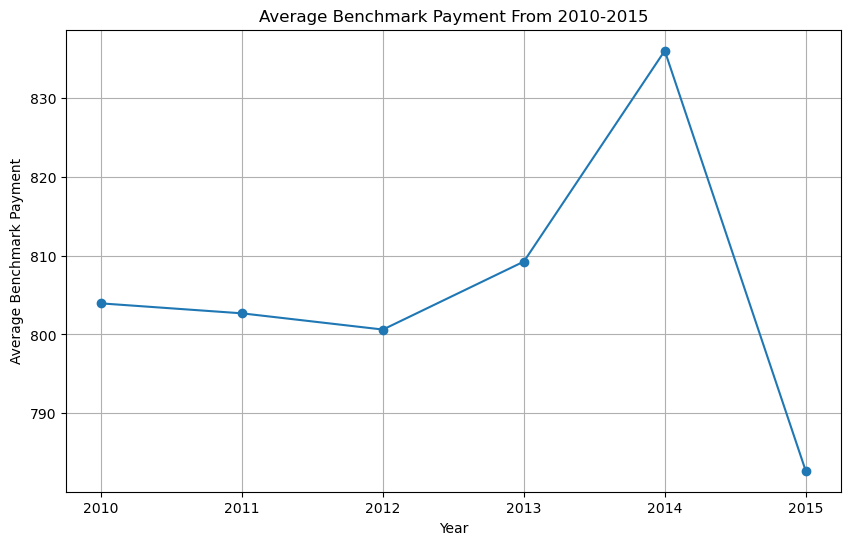

-21.236870591187085


In [166]:
#| echo: false

#QUESTION 3 
avg_benchmark_pay = final_ma_data.groupby('year')['ma_rate'].mean().reset_index()

#ploting average benchmark payment 2010-2015
plt.figure(figsize=(10, 6))
plt.plot(avg_benchmark_pay['year'], avg_benchmark_pay['ma_rate'], marker='o')
plt.title('Average Benchmark Payment From 2010-2015')
plt.xlabel('Year')
plt.ylabel('Average Benchmark Payment')
plt.grid(True)
plt.show()

#Calculating the rise in average benchmark payment from 2010 to 2015
benchmark_2010 = avg_benchmark_pay[avg_benchmark_pay['year'] == 2010]['ma_rate'].values[0]
benchmark_2015 = avg_benchmark_pay[avg_benchmark_pay['year'] == 2015]['ma_rate'].values[0]
rise = benchmark_2015 - benchmark_2010

print(rise)



The average benchmark payment has fallen by $21.24 from the years 2010-2015. Through the years, there wasn't much change from 2010-2012, but 2012-2014 saw a sharp increase. There was a sharp drop off in from 2014-2015.

Question 4

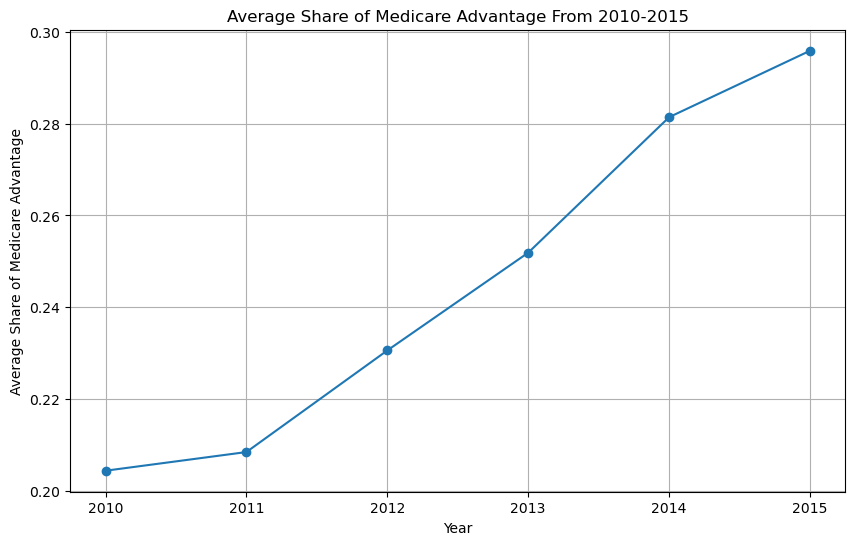

In [167]:
#| echo: false

#QUESTION 4 

final_ma_data_copy = final_ma_data.copy()
final_ma_data_copy['ma_share'] = final_ma_data_copy['avg_enrolled'] / final_ma_data_copy['avg_eligibles']
final_ma_data_copy = final_ma_data_copy.groupby('year')['ma_share'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(final_ma_data_copy['year'], final_ma_data_copy['ma_share'], marker='o')
plt.title('Average Share of Medicare Advantage From 2010-2015')
plt.xlabel('Year')
plt.ylabel('Average Share of Medicare Advantage')
plt.grid(True)
plt.show()



The share of Medicare Advantage increased from 2010-2015, but there is no obvious correlation between this and benchmark payments.

Question 5

In [168]:
#| echo: false

#Question 5
final_data_2 = final_ma_data.copy() 

final_2010 = final_data_2[final_data_2['year'] == 2010]
final_2010 = final_2010.dropna(subset=[ 'star_rating', 'avg_enrolled', 'avg_eligibles', 'partc_score', 'ma_rate']) 
final_2010 = final_2010.drop_duplicates(subset=["contractid", "planid", "county"])

rating_variables = [
    "breastcancer_screen", "rectalcancer_screen", "cv_cholscreen", "diabetes_cholscreen",
    "glaucoma_test", "monitoring", "flu_vaccine", "pn_vaccine", "physical_health",
    "mental_health", "osteo_test", "physical_monitor", "primaryaccess",
    "hospital_followup", "depression_followup", "nodelays", "carequickly",
    "overallrating_care", "overallrating_plan", "calltime",
    "doctor_communicate", "customer_service", "osteo_manage",
    "diabetes_eye", "diabetes_kidney", "diabetes_bloodsugar",
    "diabetes_chol", "antidepressant", "bloodpressure", "ra_manage",
    "copd_test", "betablocker", "bladder", "falling", "appeals_timely", "appeals_review"
]

final_2010["raw_rating"] = final_2010[rating_variables].mean(axis=1, skipna=True)

columns = [
    "contractid", "planid", "fips", "avg_enrollment", "state", "county", "raw_rating",
    "partc_score", "avg_eligibles", "avg_enrolled",  "risk_ab",
    "star_rating",  "ma_rate", "plan_type", "partd"
]

final_2010 = final_2010[columns]

final_2010 = final_2010[final_2010["plan_type"] == "HMO/HMOPOS"]

final_2010["rounded_30"] = np.where(
    (final_2010["raw_rating"] >= 2.75) & 
    (final_2010["raw_rating"] < 3.00) & 
    (final_2010["star_rating"] == 3.0), 1, 0)

final_2010["rounded_35"] = np.where(
    (final_2010["raw_rating"] >= 3.25) & 
    (final_2010["raw_rating"] < 3.50) & 
    (final_2010["star_rating"] == 3.5), 1, 0)

final_2010["rounded_40"] = np.where(
    (final_2010["raw_rating"] >= 3.75) & 
    (final_2010["raw_rating"] < 4.00) & 
    (final_2010["star_rating"] == 4.0), 1, 0)

final_2010["rounded_45"] = np.where(
    (final_2010["raw_rating"] >= 4.25) & 
    (final_2010["raw_rating"] < 4.50) & 
    (final_2010["star_rating"] == 4.5), 1, 0)

final_2010["rounded_50"] = np.where(
    (final_2010["raw_rating"] >= 4.75) & 
    (final_2010["raw_rating"] < 5.00) & 
    (final_2010["star_rating"] == 5.0), 1, 0)


summary = (

     final_2010[final_2010["star_rating"].isin([3.0, 3.5, 4.0, 4.5, 5.0])]
    .groupby("star_rating")
    .agg(
        count_30=("rounded_30", "sum"),
        count_35=("rounded_35", "sum"),
        count_40=("rounded_40", "sum"),
        count_45=("rounded_45", "sum"),
        count_50=("rounded_50", "sum")
    )
    .reset_index()
)

summary["rounded"] = (
    summary["count_30"] +
    summary["count_35"] +
    summary["count_40"] +
    summary["count_45"] +
    summary["count_50"]
)

summary = summary [['star_rating', 'rounded']]

summary 

    

,star_rating,rounded
0,3.0,2434
1,3.5,1632
2,4.0,65
3,4.5,0
4,5.0,0


Question 6

In [169]:
#| echo: false

#QUESTION 6 


final_2010['mktshare'] = final_2010['avg_enrolled'] / final_2010['avg_eligibles']

# 3 star 
final_2010['score_3'] = final_2010['raw_rating'] - 2.75
final_2010['treat_3'] = (final_2010['star_rating'] == 3.0).astype(int)
final_2010['score_treat_3'] = final_2010['score_3'] * final_2010['treat_3']

#  0.125 bw
final_2010_bw = final_2010[final_2010['score_3'].between(-0.125, 0.125)].copy()

reg1 = smf.ols("mktshare ~ score_3 + treat_3", data=final_2010_bw).fit()
print(reg1.summary())






                            OLS Regression Results                            
Dep. Variable:               mktshare   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.188
Date:                Fri, 11 Apr 2025   Prob (F-statistic):            0.00568
Time:                        18:41:49   Log-Likelihood:                 1013.6
No. Observations:                1588   AIC:                            -2021.
Df Residuals:                    1585   BIC:                            -2005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2623      0.022     11.827      0.0

In [170]:
#| echo: false


# 3.5 Star
final_2010['score_35'] = final_2010['raw_rating'] - 3.25
final_2010['treat_35'] = (final_2010['star_rating'] == 3.5).astype(int)

final_2010_bw_35 = final_2010[final_2010['score_35'].between(-0.125, 0.125)].copy()
reg2 = smf.ols("mktshare ~ score_35 + treat_35", data=final_2010_bw_35).fit()
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:               mktshare   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     49.91
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           7.18e-22
Time:                        18:41:49   Log-Likelihood:                 1154.9
No. Observations:                1979   AIC:                            -2304.
Df Residuals:                    1976   BIC:                            -2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2709      0.010     26.902      0.0

In [171]:
#| echo: false



# building table 
def extract_model_info(model, coef_labels):
    coef = model.params
    se = model.bse
    n = int(model.nobs)
    r2 = round(model.rsquared, 6)

    formatted = {
        "Intercept": f"{coef.get('Intercept', float('nan')):.3f} ({se.get('Intercept', float('nan')):.3f})"
    }

    for var, label in coef_labels.items():
        formatted[label] = f"{coef.get(var, float('nan')):.3f} ({se.get(var, float('nan')):.3f})"

    formatted["N"] = n
    formatted["R2"] = r2
    return formatted

# Label maps
coef_labels_3 = {
    "treat_3": "Rounded",
    "score_3": "Running Score"
}

coef_labels_35 = {
    "treat_35": "Rounded",
    "score_35": "Running Score"
}

# Extract rows
row_3 = extract_model_info(reg1, coef_labels_3)
row_35 = extract_model_info(reg2, coef_labels_35)

# Build final table
final_table = pd.DataFrame({
    "": ["Intercept", "Rounded", "Running Score", "N", "R2"],
    "3-Star Threshold": [
        row_3["Intercept"], row_3["Rounded"], row_3["Running Score"], row_3["N"], row_3["R2"]
    ],
    "3.5-Star Threshold": [
        row_35["Intercept"], row_35["Rounded"], row_35["Running Score"], row_35["N"], row_35["R2"]
    ]
})

# Set index and style
final_table.set_index("", inplace=True)

final_table


,3-Star Threshold,3.5-Star Threshold
,,
Intercept,0.262 (0.022),0.271 (0.010)
Rounded,-0.012 (0.023),-0.035 (0.010)
Running Score,0.236 (0.074),0.459 (0.052)
N,1588,1979
R2,0.006503,0.048083


Question 7

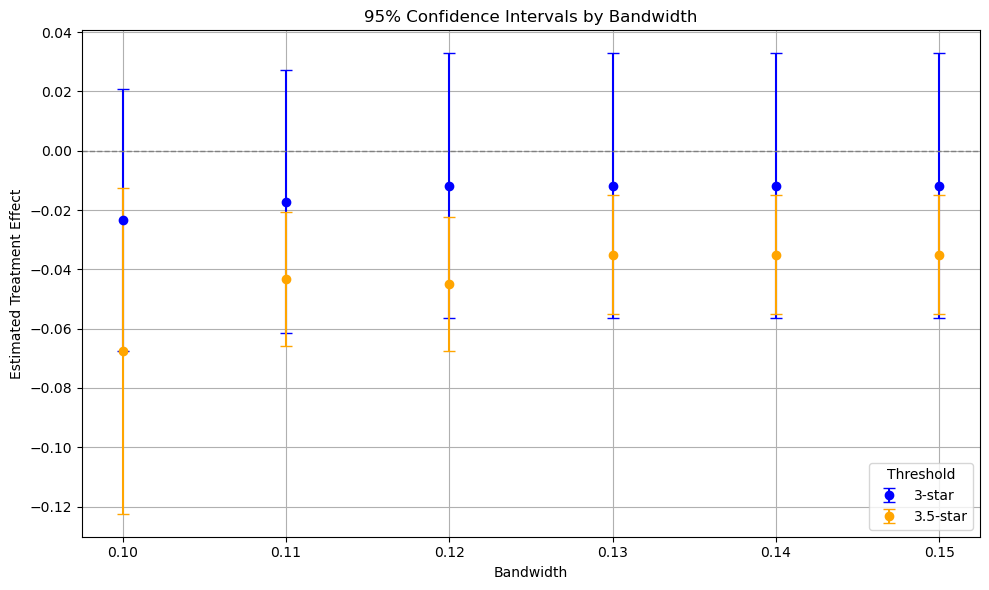

In [172]:
#| echo: false


#QUESTION 7
bandwidths = [0.10, 0.11, 0.12, 0.13, 0.14, 0.15]
results = []

for bw in bandwidths:
    # 3-star
    bw_3 = final_2010_bw[final_2010_bw['score_3'].between(-bw, bw)]
    mod_3 = smf.ols("mktshare ~ score_3 + treat_3", data=bw_3).fit()
    coef_3 = mod_3.params.get("treat_3", np.nan)
    se_3 = mod_3.bse.get("treat_3", np.nan)
# 3.5-star
    bw_35 = final_2010_bw_2[final_2010_bw_2['score_35'].between(-bw, bw)]
    mod_35 = smf.ols("mktshare ~ score_35 + treat_35", data=bw_35).fit()
    coef_35 = mod_35.params.get("treat_35", np.nan)
    se_35 = mod_35.bse.get("treat_35", np.nan)

    results.append({
        "Bandwidth": bw,
        "Effect at 3-star": coef_3,
        "SE at 3-star": se_3,
        "Effect at 3.5-star": coef_35,
        "SE at 3.5-star": se_35
    })


bandwidth_df = pd.DataFrame(results)

#Plotting Results
plt.figure(figsize=(10, 6))

plt.errorbar(
    bandwidth_df["Bandwidth"],
    bandwidth_df["Effect at 3-star"],
    yerr=1.96 * bandwidth_df["SE at 3-star"],
    fmt='o', label="3-star", capsize=4, color='blue'
)

plt.errorbar(
    bandwidth_df["Bandwidth"],
    bandwidth_df["Effect at 3.5-star"],
    yerr=1.96 * bandwidth_df["SE at 3.5-star"],
    fmt='o', label="3.5-star", capsize=4, color='orange'
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("95% Confidence Intervals by Bandwidth")
plt.xlabel("Bandwidth")
plt.ylabel("Estimated Treatment Effect")
plt.legend(title="Threshold")
plt.grid(True)
plt.tight_layout()
plt.show()

For the 3 star thresholds, the estimated treatment effect is consistently negative but is pretty stable. This means that it is not very sensitive to bandwidth choice. The 3.5 star threshold is also consistently negative, but there is a lot more variation meaning it is much morh sensitive to bandwidth choice.

Question 8

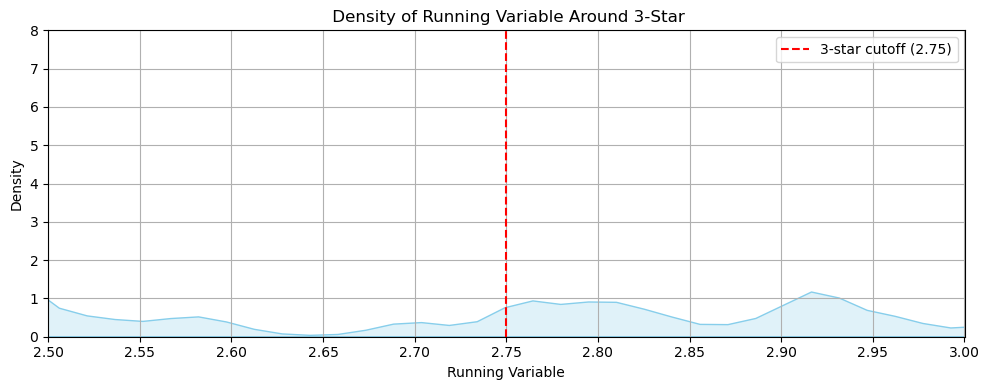

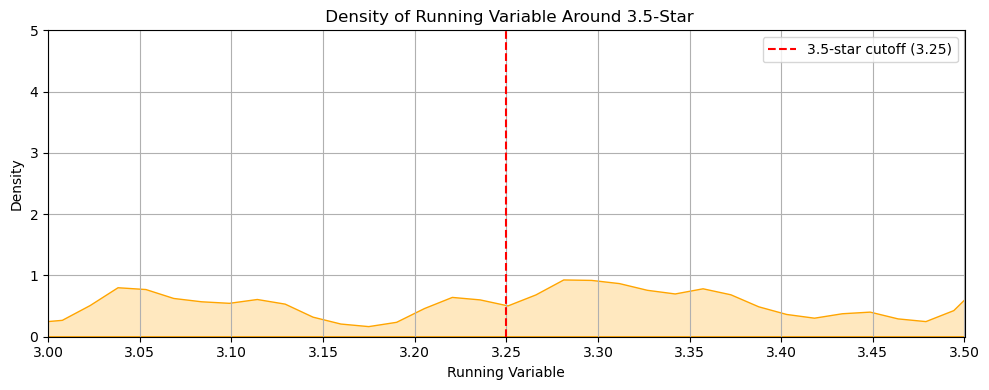

In [173]:
#| echo: false


#QUESTION 8 
import seaborn as sns

# KDE plot for 3-star cutoff (zoomed in)
plt.figure(figsize=(10, 4))
sns.kdeplot(final_2010['raw_rating'], bw_adjust=0.2, fill=True, color='skyblue')
plt.axvline(2.75, color='red', linestyle='--', label='3-star cutoff (2.75)')
plt.xlim(2.5, 3.0)
plt.xticks(np.arange(2.5, 3.05, 0.05))
plt.ylim(0, 8.0)
plt.title(" Density of Running Variable Around 3-Star")
plt.xlabel("Running Variable")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# KDE plot for 3.5-star cutoff (zoomed in)
plt.figure(figsize=(10, 4))
sns.kdeplot(final_2010['raw_rating'], bw_adjust=0.2, fill=True, color='orange')
plt.axvline(3.25, color='red', linestyle='--', label='3.5-star cutoff (3.25)')
plt.xlim(3.0, 3.5)
plt.ylim(0, 5.0)
plt.xticks(np.arange(3.0, 3.55, 0.05))
plt.title(" Density of Running Variable Around 3.5-Star")
plt.xlabel("Running Variable")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Both the 3 star and 3.5 star levels are both fairly stable, with few spikes. This means that there wasn't much of a manipulation effect.

Question 9

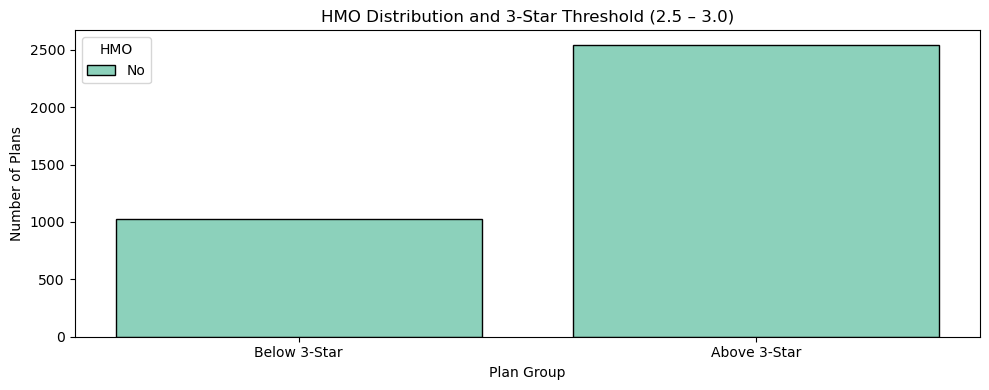

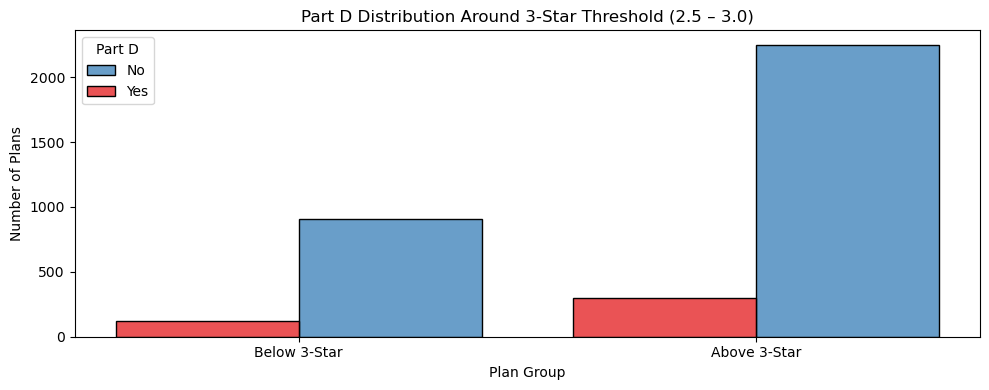

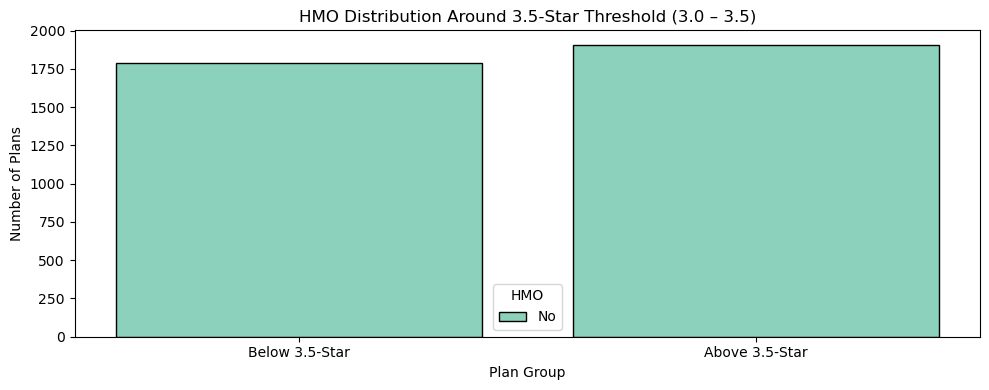

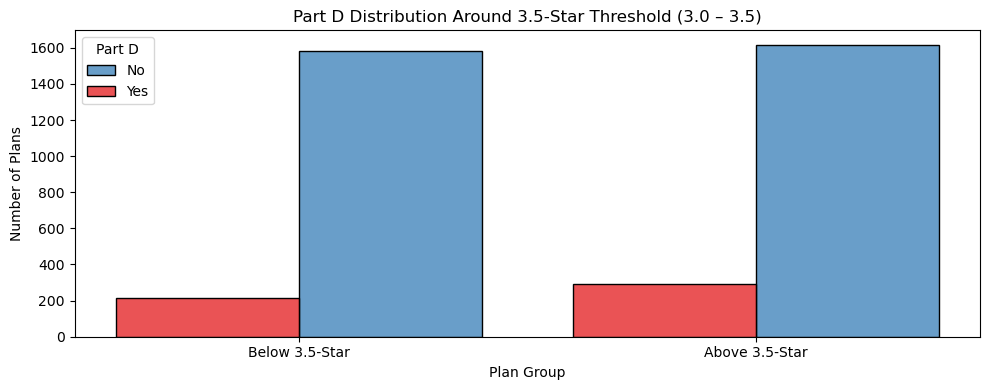

In [174]:
#| echo: false



#QUESTION 9

final_2010["is_hmo"] = final_2010["plan_type"].str.contains("HMO/HMOPOS", na=False).astype(int)
final_2010["has_partd"] = (final_2010["partd"] == "Yes").astype(int)

# Create the threshold bands
band_3 = final_2010[final_2010["raw_rating"].between(2.5, 3.0)].copy()
band_3["group"] = np.where(band_3["raw_rating"] >= 2.75, "Above 3-Star", "Below 3-Star")
band_3["group"] = pd.Categorical(band_3["group"], categories=["Below 3-Star", "Above 3-Star"], ordered=True)

band_35 = final_2010[final_2010["raw_rating"].between(3.0, 3.5)].copy()
band_35["group"] = np.where(band_35["raw_rating"] >= 3.25, "Above 3.5-Star", "Below 3.5-Star")

# Plot HMO distribution near 3-star threshold
plt.figure(figsize=(10, 4))
sns.histplot(data=band_3, x="group", hue="is_hmo", multiple="dodge", shrink=0.8, palette="Set2")
plt.title("HMO Distribution and 3-Star Threshold (2.5 – 3.0)")
plt.xlabel("Plan Group")
plt.ylabel("Number of Plans")
plt.legend(title="HMO", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

# Plot Part D distribution near 3-star threshold
plt.figure(figsize=(10, 4))
sns.histplot(data=band_3, x="group", hue="has_partd", multiple="dodge", shrink=0.8, palette="Set1")
plt.title("Part D Distribution Around 3-Star Threshold (2.5 – 3.0)")
plt.xlabel("Plan Group")
plt.ylabel("Number of Plans")
plt.legend(title="Part D", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

# Plot HMO distribution near 3.5-star threshold
plt.figure(figsize=(10, 4))
sns.histplot(data=band_35, x="group", hue="is_hmo", multiple="dodge", shrink=0.8, palette="Set2")
plt.title("HMO Distribution Around 3.5-Star Threshold (3.0 – 3.5)")
plt.xlabel("Plan Group")
plt.ylabel("Number of Plans")
plt.legend(title="HMO", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

# Plot Part D distribution near 3.5-star threshold
plt.figure(figsize=(10, 4))
sns.histplot(data=band_35, x="group", hue="has_partd", multiple="dodge", shrink=0.8, palette="Set1")
plt.title("Part D Distribution Around 3.5-Star Threshold (3.0 – 3.5)")
plt.xlabel("Plan Group")
plt.ylabel("Number of Plans")
plt.legend(title="Part D", labels=["No", "Yes"])
plt.tight_layout()
plt.show()



For Plan D plan characteristics, at the 3 star level, there are more plans above the threshold than there are below the threshold. For 3.5 stars, theres a similar amount of plans both below and above the threshold.

Question 10:


Overall, we know that both enrollments ratings have increased over time as well as star ratings. The results found from Question 6 show us that that Star Rating has an effect on market share. 